In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
ticker = "MSFT"
start_date = "2022-01-01"
end_date = "2025-01-01"
data = yf.download(ticker, start=start_date, end=end_date)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2022-01-03,326.287720,329.455562,321.443357,326.872558,28865100
2022-01-04,320.692841,326.726364,317.875884,326.365692,32674300
2022-01-05,308.382080,317.827124,307.992198,317.622411,40054300
2022-01-06,305.945282,310.643442,303.615686,305.233725,39646100
2022-01-07,306.101196,308.499000,302.251039,306.208401,32720000


In [7]:
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
data.isnull().sum()


Price   Ticker
Close   MSFT      0
High    MSFT      0
Low     MSFT      0
Open    MSFT      0
Volume  MSFT      0
dtype: int64

In [37]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()  # Calculate the difference in 'Close' prices
    gain = np.where(delta > 0, delta, 0)  # Positive gains
    loss = np.where(delta < 0, -delta, 0)  # Negative losses

    gain = gain.ravel()
    loss = loss.ravel()

    avg_gain = pd.Series(gain).rolling(window=window).mean()
    avg_loss = pd.Series(loss).rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Display the first few rows with new features
data.head()


Price,Close,High,Low,Open,Volume,MA_20,MA_50,RSI,EMA_12,EMA_26,MACD,Signal_Line
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,,,,,,,
Date,,,,,,,,,,,,
2022-01-03,326.287720,329.455562,321.443357,326.872558,28865100,NaN,NaN,NaN,326.287720,326.287720,0.000000,0.000000
2022-01-04,320.692841,326.726364,317.875884,326.365692,32674300,NaN,NaN,NaN,325.426969,325.873284,-0.446315,-0.089263
2022-01-05,308.382080,317.827124,307.992198,317.622411,40054300,NaN,NaN,NaN,322.804678,324.577639,-1.772961,-0.426003
2022-01-06,305.945282,310.643442,303.615686,305.233725,39646100,NaN,NaN,NaN,320.210925,323.197465,-2.986540,-0.938110
2022-01-07,306.101196,308.499000,302.251039,306.208401,32720000,NaN,NaN,NaN,318.040198,321.931075,-3.890877,-1.528663


In [36]:
plt.figure(figsize=(16,10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

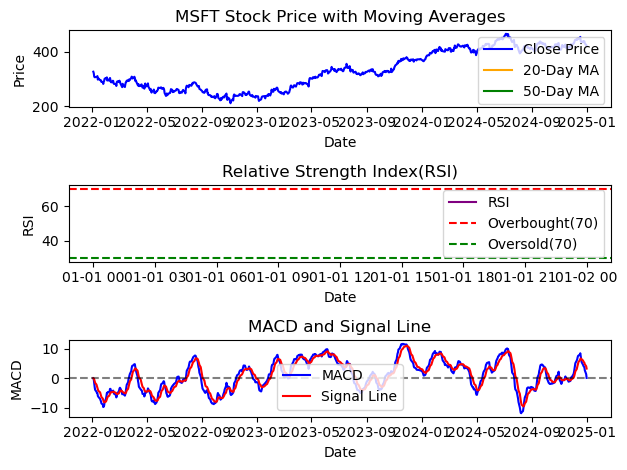

In [39]:
plt.subplot(3, 1, 1)
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['MA_20'], label='20-Day MA', color='orange')
plt.plot(data.index, data['MA_50'], label='50-Day MA', color='green')
plt.title(f"{ticker} Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

plt.subplot(3,1,2)
plt.plot(data.index, data['RSI'], label='RSI', color = 'purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought(70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold(70)')
plt.title("Relative Strength Index(RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data.index, data['MACD'], label='MACD', color='blue')
plt.plot(data.index, data['Signal_Line'], label='Signal Line', color='red')
plt.axhline(0, linestyle='--', color='black', alpha=0.5)
plt.title("MACD and Signal Line")
plt.xlabel("Date")
plt.ylabel("MACD")
plt.legend()

plt.tight_layout()
plt.show()


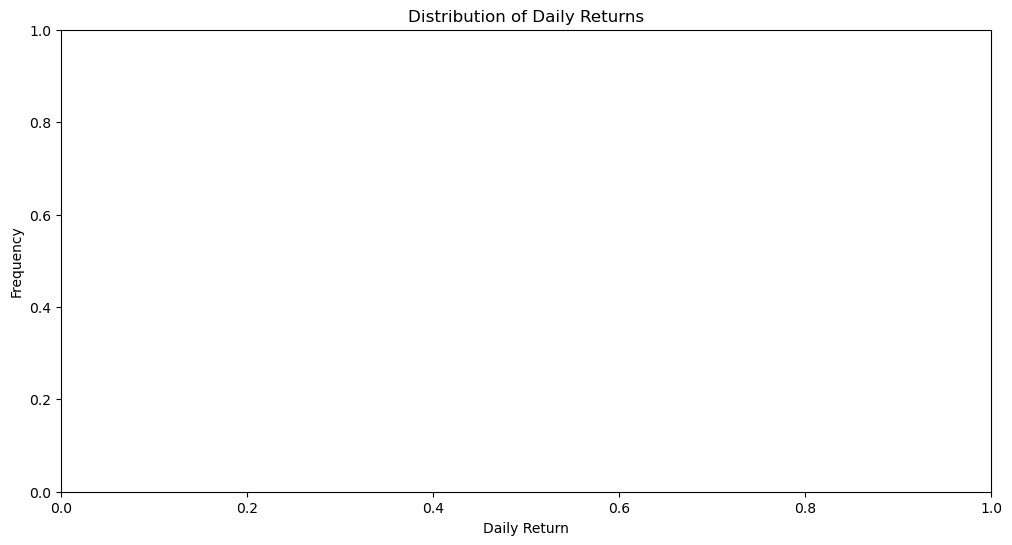

In [41]:
data['Daily_Return'] = data['Close'].pct_change()

plt.figure(figsize=(12,6))
sns.histplot(data['Daily_Return'].dropna(), kde=True, bins=50, color='blue')
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

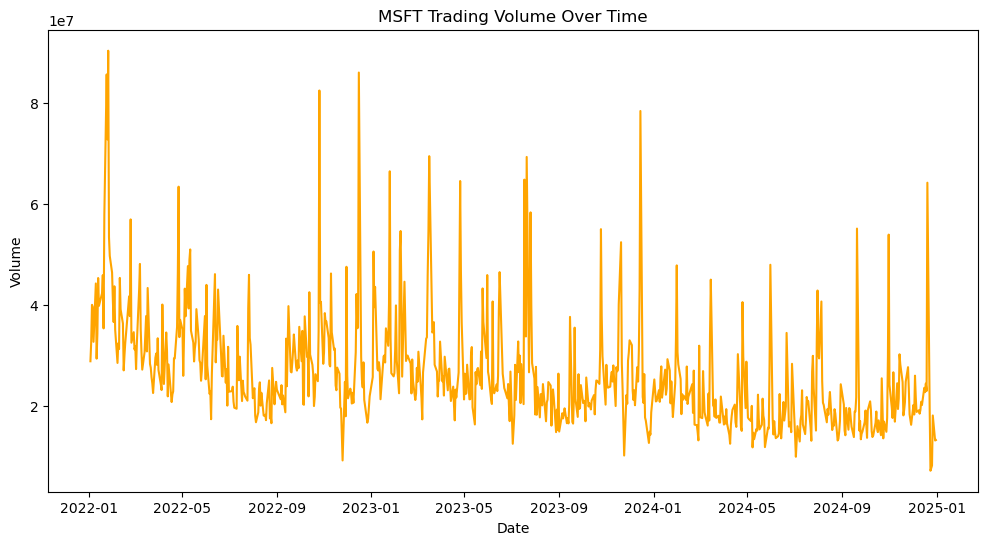

In [42]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Volume'], label='Volume', color='orange')
plt.title(f"{ticker} Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

In [47]:
# Save the processed data to a CSV file
data.to_csv(r"C:\Users\ASUS\Desktop\Data Science\MSFT_processed_data.csv", index=True)
